Bring sonar dataset

In [74]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'acc']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
df = pd.read_csv('sonar.csv', header=None) 
yZ = df[60]
df.drop([60],axis=1, inplace=True)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [79]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df[60] = yZ
scaled_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947,0
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852,0
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582,0
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640,0
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375,0


In [80]:
scaled_features_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,208.000000
mean,1.708035e-17,6.832142e-17,-1.195625e-16,1.622634e-16,-1.793437e-16,2.049643e-16,1.024821e-16,3.416071e-17,-3.757678e-16,3.416071e-17,...,1.024821e-16,3.416071e-17,-1.451830e-16,2.775558e-17,-2.391250e-16,3.416071e-17,-1.110223e-16,1.345078e-16,7.686159e-17,0.533654
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,0.500070
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,...,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00,0.000000
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,...,-6.394049e-01,-7.999231e-01,-7.642025e-01,-7.270112e-01,-6.678488e-01,-7.138771e-01,-6.738235e-01,-6.918580e-01,-6.788714e-01,0.000000
50%,-2.774703e-01,-2.322506e-01,-2.486515e-01,-2.120457e-01,-2.292089e-01,-2.106432e-01,-2.400524e-01,-2.672134e-01,-2.180558e-01,-1.928459e-01,...,-2.102002e-01,-1.645716e-01,-2.252935e-01,-2.532164e-01,-2.396997e-01,-3.240352e-01,-3.329639e-01,-2.499546e-01,-2.405314e-01,1.000000
75%,2.784345e-01,2.893335e-01,3.682681e-01,2.285353e-01,4.524231e-01,5.012417e-01,5.232608e-01,4.096773e-01,4.692723e-01,4.507410e-01,...,3.438640e-01,5.950106e-01,4.886751e-01,3.973675e-01,4.112618e-01,4.513169e-01,3.719959e-01,3.865486e-01,4.020352e-01,1.000000
max,4.706053e+00,5.944643e+00,6.836142e+00,8.025419e+00,5.878863e+00,4.710224e+00,4.074573e+00,3.816498e+00,4.274237e+00,3.746234e+00,...,5.980752e+00,4.016680e+00,3.330819e+00,5.008027e+00,5.448568e+00,4.795888e+00,5.585599e+00,4.615037e+00,7.450343e+00,1.000000


In [82]:

test = scaled_features_df.sample(frac=0.20, replace=True, random_state=1)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
37,0.180334,-0.496844,-0.439075,-0.124791,-0.131768,-0.109733,-0.607513,-0.207176,-0.864529,-0.867009,...,-1.167457,-1.066132,-0.678389,-0.550222,-0.335815,1.122711,0.813564,-0.460771,-0.479626,0
140,0.524777,2.282910,0.207843,-0.661244,-0.191315,0.132791,0.923980,1.246667,0.763720,-0.018339,...,2.515900,0.509824,2.232406,0.482226,1.464159,0.291049,2.254471,0.301411,0.397054,1
72,-0.364671,-0.603290,-0.801662,-0.706487,-0.256276,-0.733851,-0.982275,-0.991192,-0.669783,-0.737993,...,-0.626399,-0.626000,-0.390056,-0.083499,-0.667849,-0.869814,-0.937215,-0.493204,-0.838268,0
137,0.603257,1.574286,1.029533,0.590480,-1.059257,-1.303698,-1.052036,0.834647,1.784023,3.746234,...,0.434907,1.276505,1.381136,0.680230,-0.580471,-0.887140,1.278373,-0.331038,-0.878117,1
203,-0.456232,-0.116681,-0.705146,-0.779738,-0.647842,0.990954,1.314965,0.407323,0.463980,0.448504,...,-0.189390,-0.129077,1.230104,-0.847228,0.328253,-0.228741,0.550172,1.841992,1.831621,1


In [83]:
train = scaled_features_df.drop(test.index)
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
201,0.189054,-0.384316,-0.105182,0.066953,-0.402436,0.076824,0.797437,0.395551,0.071947,0.430606,...,-0.147770,-0.966747,-0.774500,-0.437077,-0.632898,-0.575267,-0.890734,-1.206736,-0.678871,1
202,-0.085629,-0.019359,0.129587,0.665885,0.676626,0.097176,0.213393,1.164263,1.128658,1.427681,...,-0.449514,-0.881560,-0.911802,-0.705796,0.275827,-0.419330,-0.441419,-0.233738,0.755696,1
205,1.004381,0.160078,-0.673843,-0.531979,-0.723629,0.212502,0.064137,-0.200113,-0.442014,0.332912,...,0.268428,-1.108725,-0.801960,-0.437077,0.118548,1.070732,0.906526,-0.039138,-0.678871,1
206,0.049533,-0.095392,0.134804,0.148821,-1.055648,0.522865,0.401585,-0.264859,0.139685,0.202404,...,-0.501539,-0.867363,0.227802,-0.804798,-0.825128,-0.765856,-0.007598,-0.704020,-0.340154,1
207,-0.137949,-0.064979,-0.788619,-0.575067,-0.970839,-1.200244,-0.912514,0.061226,0.053319,0.202404,...,0.122759,0.311055,-0.856881,-0.762369,-0.370766,-0.661898,-0.673823,-0.298604,0.994790,1


In [84]:
## Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(train[60])
y_test_one_hot = lb.transform(test[60])
train.drop([60],axis=1, inplace=True)
test.drop([60],axis=1, inplace=True)


print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[100])

Train labels dimension:
(168, 1)
Test labels dimension:
(42, 1)
[1]


In [211]:
# Defining various initialization parameters for 61-64-16-1 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 64; num_layers_1 = 16

# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='linear'))
model.add(Dense(num_layers_1, activation='sigmoid'))
model.add(Dense(num_classes, activation='tanh'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['mean_squared_logarithmic_error','binary_accuracy'])
# Fit keras model
history = model.fit(train, y_train_one_hot, epochs=128, batch_size=4, validation_split = 0.20)

Train on 134 samples, validate on 34 samples
Epoch 1/128
134/134 [==============================] - 2s 16ms/step - loss: 0.6542 - mean_squared_logarithmic_error: 0.1197 - binary_accuracy: 0.6567 - val_loss: 3.3928 - val_mean_squared_logarithmic_error: 0.2127 - val_binary_accuracy: 0.2941
Epoch 2/128
134/134 [==============================] - 0s 776us/step - loss: 0.4785 - mean_squared_logarithmic_error: 0.0786 - binary_accuracy: 0.7239 - val_loss: 0.9034 - val_mean_squared_logarithmic_error: 0.1229 - val_binary_accuracy: 0.5294
Epoch 3/128
134/134 [==============================] - 0s 748us/step - loss: 0.4516 - mean_squared_logarithmic_error: 0.0751 - binary_accuracy: 0.7687 - val_loss: 2.2675 - val_mean_squared_logarithmic_error: 0.1627 - val_binary_accuracy: 0.4118
Epoch 4/128
134/134 [==============================] - 0s 911us/step - loss: 0.4268 - mean_squared_logarithmic_error: 0.0697 - binary_accuracy: 0.7910 - val_loss: 2.2331 - val_mean_squared_logarithmic_error: 0.1576 - val_

134/134 [==============================] - 0s 880us/step - loss: 0.2020 - mean_squared_logarithmic_error: 0.0295 - binary_accuracy: 0.7388 - val_loss: 1.6721 - val_mean_squared_logarithmic_error: 0.1195 - val_binary_accuracy: 0.6471
Epoch 35/128
134/134 [==============================] - 0s 882us/step - loss: 0.1999 - mean_squared_logarithmic_error: 0.0281 - binary_accuracy: 0.7239 - val_loss: 1.9426 - val_mean_squared_logarithmic_error: 0.1154 - val_binary_accuracy: 0.6765
Epoch 36/128
134/134 [==============================] - 0s 872us/step - loss: 0.1939 - mean_squared_logarithmic_error: 0.0279 - binary_accuracy: 0.7239 - val_loss: 1.8952 - val_mean_squared_logarithmic_error: 0.1090 - val_binary_accuracy: 0.6765
Epoch 37/128
134/134 [==============================] - 0s 832us/step - loss: 0.1903 - mean_squared_logarithmic_error: 0.0269 - binary_accuracy: 0.7164 - val_loss: 1.5274 - val_mean_squared_logarithmic_error: 0.1049 - val_binary_accuracy: 0.6765
Epoch 38/128
134/134 [=======

134/134 [==============================] - 0s 546us/step - loss: 0.0904 - mean_squared_logarithmic_error: 0.0102 - binary_accuracy: 0.7015 - val_loss: 3.6041 - val_mean_squared_logarithmic_error: 0.1359 - val_binary_accuracy: 0.6471
Epoch 68/128
134/134 [==============================] - 0s 562us/step - loss: 0.0887 - mean_squared_logarithmic_error: 0.0098 - binary_accuracy: 0.7015 - val_loss: 3.6048 - val_mean_squared_logarithmic_error: 0.1370 - val_binary_accuracy: 0.6471
Epoch 69/128
134/134 [==============================] - 0s 501us/step - loss: 0.0872 - mean_squared_logarithmic_error: 0.0099 - binary_accuracy: 0.7015 - val_loss: 4.0168 - val_mean_squared_logarithmic_error: 0.1430 - val_binary_accuracy: 0.6471
Epoch 70/128
134/134 [==============================] - 0s 507us/step - loss: 0.0852 - mean_squared_logarithmic_error: 0.0100 - binary_accuracy: 0.6866 - val_loss: 3.9905 - val_mean_squared_logarithmic_error: 0.1388 - val_binary_accuracy: 0.6471
Epoch 71/128
134/134 [=======

134/134 [==============================] - 0s 543us/step - loss: 0.0459 - mean_squared_logarithmic_error: 0.0040 - binary_accuracy: 0.6716 - val_loss: 3.5667 - val_mean_squared_logarithmic_error: 0.1311 - val_binary_accuracy: 0.7059
Epoch 101/128
134/134 [==============================] - 0s 705us/step - loss: 0.0442 - mean_squared_logarithmic_error: 0.0040 - binary_accuracy: 0.6642 - val_loss: 3.5979 - val_mean_squared_logarithmic_error: 0.1341 - val_binary_accuracy: 0.6765
Epoch 102/128
134/134 [==============================] - 0s 563us/step - loss: 0.0436 - mean_squared_logarithmic_error: 0.0037 - binary_accuracy: 0.6716 - val_loss: 3.6327 - val_mean_squared_logarithmic_error: 0.1362 - val_binary_accuracy: 0.6471
Epoch 103/128
134/134 [==============================] - 0s 567us/step - loss: 0.0435 - mean_squared_logarithmic_error: 0.0036 - binary_accuracy: 0.6642 - val_loss: 3.6652 - val_mean_squared_logarithmic_error: 0.1389 - val_binary_accuracy: 0.6471
Epoch 104/128
134/134 [===

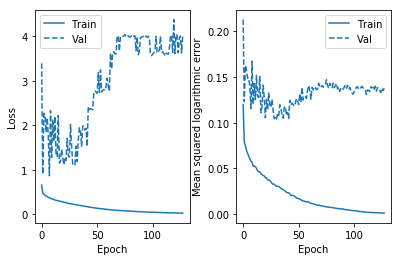

In [212]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss', 'mean_squared_logarithmic_error'])

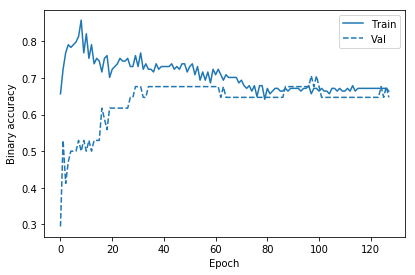

In [213]:
plot_metrics(history,  metrics =  ['binary_accuracy']) 

42/42 [==============================] - 0s 1ms/step
loss :  1.0540550629373193

mean_squared_logarithmic_error :  0.05640706092493592

binary_accuracy :  0.5952380952380952



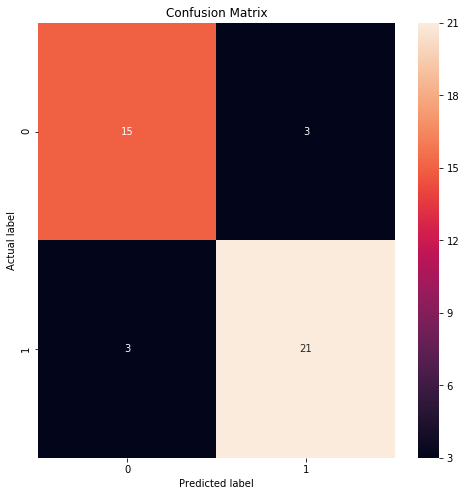

In [214]:
y_test_predictions = model.predict_classes(test, batch_size=1)
baseline_results = model.evaluate(test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test_one_hot, y_test_predictions)

In [215]:
# Defining various initialization parameters for 61-64-64-32-1 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 64; num_layers_1 = 64; num_layers_2 = 32

# Define the keras model
model2 = Sequential()
model2.add(Dense(num_layers_0, input_dim=num_features, activation='linear'))
model2.add(Dense(num_layers_1, activation='relu'))
model2.add(Dense(num_layers_2, activation='sigmoid'))
model2.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit keras model
history2 = model2.fit(train, y_train_one_hot, epochs=256, validation_split = 0.20)

Train on 134 samples, validate on 34 samples
Epoch 1/256
134/134 [==============================] - 2s 17ms/step - loss: 0.7762 - acc: 0.4104 - val_loss: 0.5221 - val_acc: 1.0000
Epoch 2/256
134/134 [==============================] - 0s 116us/step - loss: 0.6794 - acc: 0.5149 - val_loss: 0.6087 - val_acc: 0.7647
Epoch 3/256
134/134 [==============================] - 0s 149us/step - loss: 0.6090 - acc: 0.7910 - val_loss: 0.6920 - val_acc: 0.4118
Epoch 4/256
134/134 [==============================] - 0s 142us/step - loss: 0.5595 - acc: 0.8433 - val_loss: 0.7870 - val_acc: 0.3235
Epoch 5/256
134/134 [==============================] - 0s 150us/step - loss: 0.5230 - acc: 0.8209 - val_loss: 0.8775 - val_acc: 0.3235
Epoch 6/256
134/134 [==============================] - 0s 187us/step - loss: 0.4910 - acc: 0.8060 - val_loss: 0.9514 - val_acc: 0.2941
Epoch 7/256
134/134 [==============================] - 0s 157us/step - loss: 0.4618 - acc: 0.8134 - val_loss: 0.9990 - val_acc: 0.3235
Epoch 8/256

Epoch 61/256
134/134 [==============================] - 0s 161us/step - loss: 0.0213 - acc: 1.0000 - val_loss: 1.1320 - val_acc: 0.6176
Epoch 62/256
134/134 [==============================] - 0s 155us/step - loss: 0.0206 - acc: 1.0000 - val_loss: 1.1372 - val_acc: 0.6176
Epoch 63/256
134/134 [==============================] - 0s 152us/step - loss: 0.0199 - acc: 1.0000 - val_loss: 1.1400 - val_acc: 0.6176
Epoch 64/256
134/134 [==============================] - 0s 145us/step - loss: 0.0193 - acc: 1.0000 - val_loss: 1.1455 - val_acc: 0.6176
Epoch 65/256
134/134 [==============================] - 0s 164us/step - loss: 0.0187 - acc: 1.0000 - val_loss: 1.1512 - val_acc: 0.6176
Epoch 66/256
134/134 [==============================] - 0s 135us/step - loss: 0.0181 - acc: 1.0000 - val_loss: 1.1599 - val_acc: 0.6176
Epoch 67/256
134/134 [==============================] - 0s 144us/step - loss: 0.0176 - acc: 1.0000 - val_loss: 1.1661 - val_acc: 0.6176
Epoch 68/256
134/134 [==========================

134/134 [==============================] - 0s 150us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 1.3779 - val_acc: 0.6176
Epoch 122/256
134/134 [==============================] - 0s 138us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 1.3784 - val_acc: 0.6176
Epoch 123/256
134/134 [==============================] - 0s 141us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 1.3805 - val_acc: 0.6176
Epoch 124/256
134/134 [==============================] - 0s 150us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.3838 - val_acc: 0.6176
Epoch 125/256
134/134 [==============================] - 0s 145us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.3875 - val_acc: 0.6176
Epoch 126/256
134/134 [==============================] - 0s 143us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.3926 - val_acc: 0.6176
Epoch 127/256
134/134 [==============================] - 0s 137us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 1.3979 - val_acc: 0.6176
Epoch 128/256
134/134 [==============================] 

Epoch 181/256
134/134 [==============================] - 0s 131us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.5256 - val_acc: 0.6176
Epoch 182/256
134/134 [==============================] - 0s 127us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.5292 - val_acc: 0.6176
Epoch 183/256
134/134 [==============================] - 0s 132us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.5325 - val_acc: 0.6176
Epoch 184/256
134/134 [==============================] - 0s 122us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5362 - val_acc: 0.6176
Epoch 185/256
134/134 [==============================] - 0s 147us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5393 - val_acc: 0.6176
Epoch 186/256
134/134 [==============================] - 0s 144us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5423 - val_acc: 0.6176
Epoch 187/256
134/134 [==============================] - 0s 135us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.5441 - val_acc: 0.6176
Epoch 188/256
134/134 [==================

Epoch 241/256
134/134 [==============================] - 0s 144us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.6369 - val_acc: 0.6471
Epoch 242/256
134/134 [==============================] - 0s 131us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.6387 - val_acc: 0.6471
Epoch 243/256
134/134 [==============================] - 0s 143us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.6401 - val_acc: 0.6471
Epoch 244/256
134/134 [==============================] - 0s 149us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.6406 - val_acc: 0.6471
Epoch 245/256
134/134 [==============================] - 0s 138us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.6423 - val_acc: 0.6471
Epoch 246/256
134/134 [==============================] - 0s 148us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.6442 - val_acc: 0.6471
Epoch 247/256
134/134 [==============================] - 0s 118us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.6458 - val_acc: 0.6471
Epoch 248/256
134/134 [==================

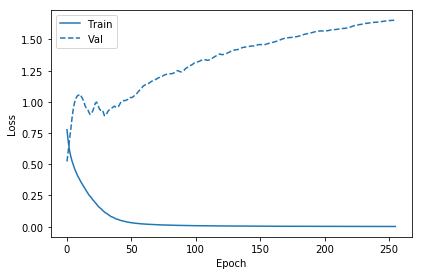

In [221]:
plot_metrics(history2, metrics =  ['loss'])

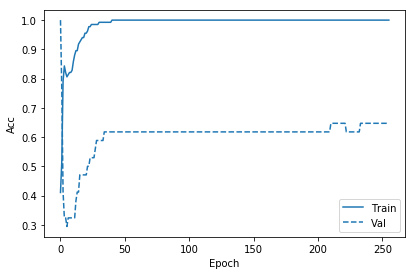

In [219]:
plot_metrics(history2, metrics =  ['acc'])

42/42 [==============================] - 0s 162us/step
loss :  0.4591059009766295

acc :  0.8809523809523809



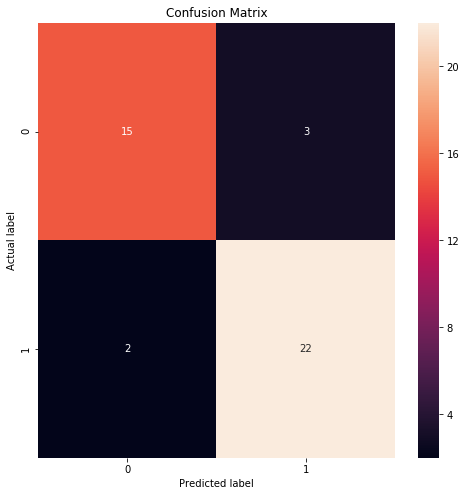

In [222]:
y_test_predictions = model2.predict_classes(test, batch_size=1)
baseline_results = model2.evaluate(test, y_test_one_hot,
                                  batch_size=8, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test_one_hot, y_test_predictions)